<a href="https://colab.research.google.com/github/JakeAMystery/FORE_ClassWork/blob/main/DLNLP/DLNLP_simpleNN_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 21st October, 2022
# fashion_mnist dataset
# https://www.kaggle.com/datasets/zalando-research/fashionmnist

In [ ]:
# 1.0
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1.1
import tensorflow as tf

# 1.2 Helper libraries
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# 1.1 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# 2.0 Mount google drive
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
# 2.1 Read FASHION-MNIST data

path = "/gdrive/MyDrive/Deep Learning/"


In [ ]:
# 2.2
data = pd.read_csv(path + "fashion_mnist_train.csv")

In [ ]:
# 2.2.1
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 2.2.2
data.shape

(60000, 785)

In [ ]:
# 2.3 Pop out target
y = data.pop('label')

In [ ]:
sorted(y.unique())
print()
y.value_counts()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: label, dtype: int64

In [ ]:
# 2.3.1
data.shape

(60000, 784)

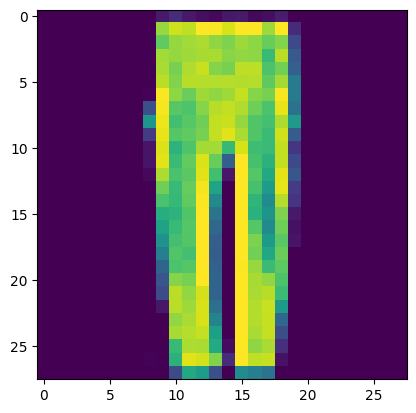

In [ ]:
# 3.0
plt.imshow(data.iloc[69,:].values.reshape(28,28))

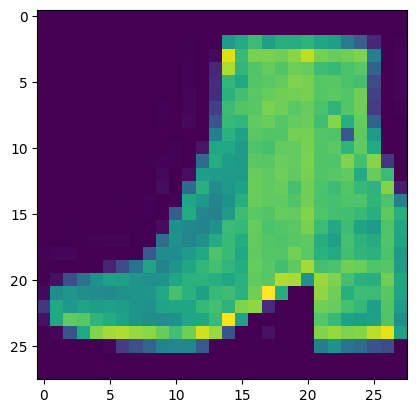

In [ ]:
plt.imshow(data.iloc[2525,:].values.reshape(28,28))

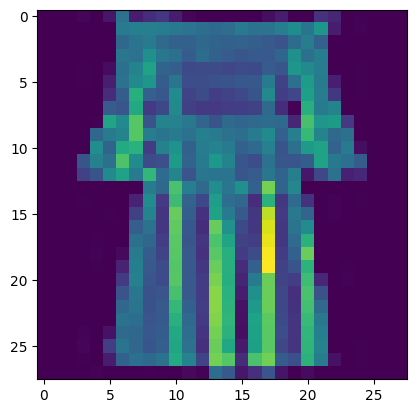

In [ ]:
plt.imshow(data.iloc[2606,:].values.reshape(28,28))

In [ ]:
# 3.1
data[:2]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.25)

In [ ]:
X_test.shape; X_train.shape; X_test.shape[0]/(X_test.shape[0]+X_train.shape[0])

(15000, 784)

(45000, 784)

0.25

In [ ]:
# 4.0
ss = StandardScaler()
ss.fit(X_train)

X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

StandardScaler()

In [ ]:
# 4.1
X_train.shape

(45000, 784)

In [ ]:
# 4.2
np.round(X_train[:10],1)

array([[-0. , -0. , -0. , ..., -0.2, -0.1, -0. ],
       [-0. , -0. , -0. , ..., -0.2, -0.1, -0. ],
       [-0. , -0. , -0. , ..., -0.2, -0.1, -0. ],
       ...,
       [-0. , -0. , -0. , ..., -0.2, -0.1, -0. ],
       [-0. , -0. , -0. , ..., -0.2, -0.1, -0. ],
       [-0. , -0. , -0. , ..., -0.2, -0.1, -0. ]])

#### Class Model

In [ ]:
model = tf.keras.Sequential()

In [ ]:
model.add( tf.keras.layers.Input((784,)))

In [ ]:
model.add(tf.keras.layers.Dense(512,'relu'))

In [ ]:
model.add(tf.keras.layers.Dense(256,'relu'))

In [ ]:
model.add(tf.keras.layers.Dense(10,'softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
                 loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics = ["accuracy"]
              )

In [ ]:
model.fit(X_train,y_train, epochs = 40)

Epoch 1/40
1407/1407 [==============================] - 14s 10ms/step - loss: 0.3650 - accuracy: 0.9097
Epoch 2/40
1407/1407 [==============================] - 12s 8ms/step - loss: 0.3739 - accuracy: 0.9120
Epoch 3/40
1407/1407 [==============================] - 11s 8ms/step - loss: 0.3799 - accuracy: 0.9174
Epoch 4/40
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3577 - accuracy: 0.9157
Epoch 5/40
1407/1407 [==============================] - 11s 8ms/step - loss: 0.3456 - accuracy: 0.9169
Epoch 6/40
1407/1407 [==============================] - 11s 8ms/step - loss: 0.3517 - accuracy: 0.9201
Epoch 7/40
1407/1407 [==============================] - 12s 8ms/step - loss: 0.3543 - accuracy: 0.9233
Epoch 8/40
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3495 - accuracy: 0.9252
Epoch 9/40
1407/1407 [==============================] - 11s 8ms/step - loss: 0.3389 - accuracy: 0.9265
Epoch 10/40
1407/1407 [==============================] - 11s 8ms/step - 

## Model

In [ ]:
# 5.0
model = tf.keras.Sequential()

In [ ]:
# 5.1
model.add( tf.keras.layers.Input(shape = [784] ))

In [ ]:
# 5.2
model.add(tf.keras.layers.Dense(20, activation = 'relu'))

In [ ]:
# 5.3
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
# 5.4 Model summary:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 5.5 Compile model
model.compile(
                 loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics = ["accuracy"]
              )

In [ ]:
# 6.0
model.fit(df,y, epochs = 50)

In [ ]:
# 6.1
model.evaluate(df,y)

1875/1875 [==============================] - 2s 939us/step - loss: 0.2720 - accuracy: 0.9168


[0.2719540297985077, 0.9168333411216736]

In [ ]:
######################### I am done #################